### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from patsy import dmatrices
import random

In [3]:
with open("movies.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)
df

,IMDBurl,AwardsWon,AwardsNominated,MetaRating,UserRating,Runtime,Year,BoxOfficeGross,OpeningWeekend,Budget
Complaints of a Dutiful Daughter,/title/tt0109465/,0,1,0.03,0.74,44,1994,0,0,0
Crimson Tide,/title/tt0112740/,0,3,0.66,0.73,116,1995,0,0,290292900000
Suzanne Farrell: Elusive Muse,/title/tt0117793/,0,1,0.03,0.80,90,1996,0,0,0
The Crime of Father Amaro,/title/tt0313196/,0,1,0.60,0.68,118,2002,570961,496290,100000
Life of Pi,/title/tt0454876/,4,0,0.79,0.80,127,2012,0,0,2245151400000
Tango,/title/tt0120274/,0,1,0.40,0.71,115,1998,0,0,7831500000
The Runaway,/title/tt0452139/,0,1,0.06,0.71,23,2004,0,0,0
Doubt,/title/tt0918927/,0,5,0.68,0.75,104,2008,3342255,507226,2000000
Fight Club,/title/tt0137523/,0,1,0.66,0.89,139,1999,37023395,11035485,6300000
Sherlock Holmes,/title/tt0988045/,0,2,0.57,0.76,128,2009,209019489,3081072,9000000


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


*Lets drop rows where BoxOfficeGross is zero. These columns indicate that there was a problem scraping the data (either the movie was not released in theaters or figures were not made public) so it's a good idea to only consider points for which we have good datal.*

In [4]:
df = df[df.BoxOfficeGross != 0]
y = df['BoxOfficeGross'].as_matrix().tolist()
x = [1 for _ in y]
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 13 Jul 2015   Prob (F-statistic):                nan
Time:                        09:02:17   Log-Likelihood:                -6088.9
No. Observations:                 288   AIC:                         1.218e+04
Df Residuals:                     287   BIC:                         1.218e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.078e+08   2.17e+07      4.964      0.000      6.51e+07  1.51e+08
==============================================================================
Omnibus:                      416.359   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42907.857
Skew:                           7.184   Prob(JB):                         0.00
Kurtosis:                      61.045   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Note that $R^{2}$ is 0 so this model explains 0% of the effect in the data - in other words, it predicts nothing at all. Given an input, this model will return the mean of BoxOfficeGross. Needless to say, that's a pretty awful model. The associated plots would be:* 

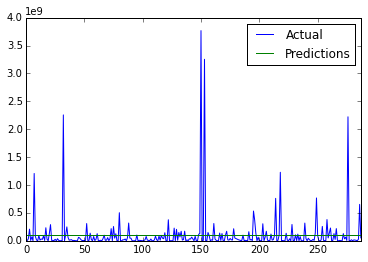

In [5]:
%matplotlib inline
ypred = results.predict(x)
xs = np.arange(len(y))
res = pd.DataFrame(index=xs, data={'Actual': y, 'Predictions': ypred})
res.plot()

(array([ 69.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.15949402e+12,   4.70299825e+17,   9.40596490e+17,
          1.41089316e+18,   1.88118982e+18,   2.35148649e+18,
          2.82178315e+18,   3.29207982e+18,   3.76237648e+18,
          4.23267315e+18,   4.70296981e+18]),
 <a list of 10 Patch objects>)

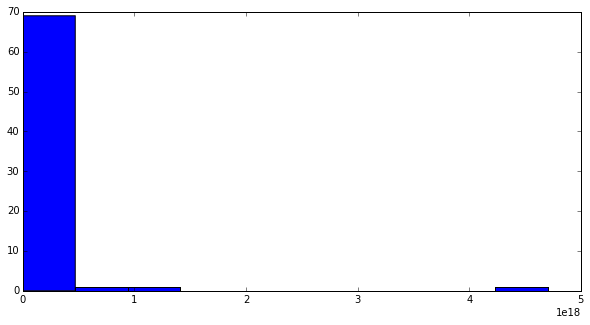

In [115]:
resid = [(ypred[i] - y[i])**2 for i in range(len(y))]
plt.figure(figsize=(10,5))
plt.hist(resid)

Oddly, the residuals don't really appear to be normally distributed. Probably because this is a really bad model.

#### Challenge 2

*Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?*

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [18]:
df = df[df.BoxOfficeGross != 0]
y = df['BoxOfficeGross'].as_matrix().tolist()
x1 = [1 for _ in y] # constant
x2 = [i for i in range(len(y))] # monotonically increasing
X = zip(x1, x2)
#y, X = dmatrices('BoxOfficeGross ~ sx + yr + rk', data=data, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3140
Date:                Mon, 13 Jul 2015   Prob (F-statistic):              0.576
Time:                        09:59:16   Log-Likelihood:                -6088.8
No. Observations:                 288   AIC:                         1.218e+04
Df Residuals:                     286   BIC:                         1.219e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.677e+07   4.34e+07      2.001      0.046      1.41e+06  1.72e+08
x1          1.465e+05   2.61e+05      0.560      0.576     -3.68e+05  6.61e+05
==============================================================================
Omnibus:                      416.454   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42985.208
Skew:                           7.187   Prob(JB):                         0.00
Kurtosis:                      61.099   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Again, the $R^{2}$ is really close to zero, indicating that this is a poor model. We also notice that the slope parameter (`x1`) is now present, but that its P-Value is fairly high, again, indicating poor fit.

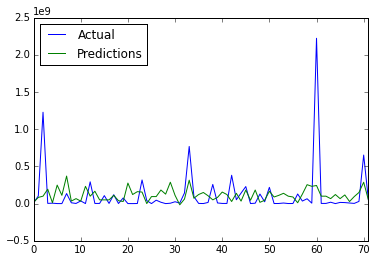

In [117]:
%matplotlib inline
ypred = results.predict(X)
res = pd.DataFrame(data={'Actual': y, 'Predictions': ypred})
res.plot()

(array([ 69.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.15949402e+12,   4.70299825e+17,   9.40596490e+17,
          1.41089316e+18,   1.88118982e+18,   2.35148649e+18,
          2.82178315e+18,   3.29207982e+18,   3.76237648e+18,
          4.23267315e+18,   4.70296981e+18]),
 <a list of 10 Patch objects>)

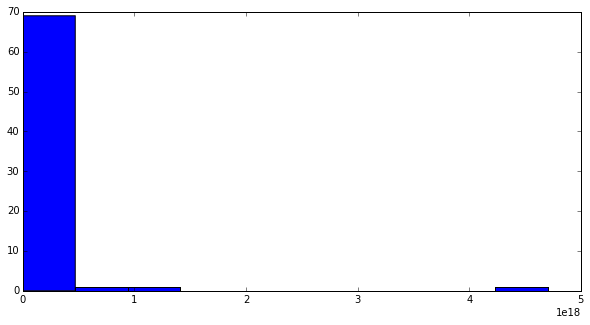

In [116]:
resid = [(ypred[i] - y[i])**2 for i in range(len(y))]
plt.figure(figsize=(10,5))
plt.hist(resid)


#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

*Errm, I don't have a column of categorical data in my dataset.*


#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [64]:
df = df[df.BoxOfficeGross != 0]
y = df['BoxOfficeGross'].as_matrix().tolist()
x1 = [1 for _ in y] # constant
x2 = df['Budget'].as_matrix().tolist()
X = zip(x1, x2)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.089
Date:                Mon, 13 Jul 2015   Prob (F-statistic):            0.00478
Time:                        11:35:47   Log-Likelihood:                -6084.9
No. Observations:                 288   AIC:                         1.217e+04
Df Residuals:                     286   BIC:                         1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.763e+07   3.01e+07      1.581      0.115     -1.17e+07  1.07e+08
x1            11.6027      4.080      2.844      0.005         3.573    19.633
==============================================================================
Omnibus:                      418.439   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44087.873
Skew:                           7.242   Prob(JB):                         0.00
Kurtosis:                      61.858   Cond. No.                     1.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Hey, this one's kinda cool! We see that there's still some uncertainty with the p-values, and the $R^{2}$ is still low, but it's starting to look more like a linear regression model and less like a `uwotm8.ipynb`.*

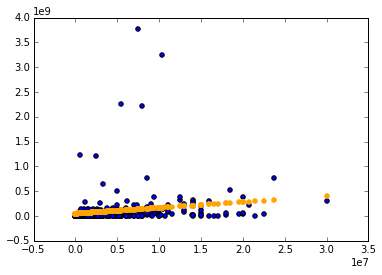

In [65]:
%matplotlib inline
ypred = results.predict(X)
res = pd.DataFrame(index=x2, data={'Actual': y, 'Predictions': ypred})
plt.scatter(x2, y)
plt.scatter(x2, ypred, color='orange')

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.


In [105]:
df
test_y = []
test_x = []
for i in range(int(len(df)*.75)):
    test_y.append(df['BoxOfficeGross'][i])
    test_x.append(df['MetaRating'][i])
y = test_y
metarating = test_x
x2 = [1 for i in range(len(x1))]
X = pd.DataFrame(data={'Meta': metarating, 'Intercept': x2})
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5470
Date:                Mon, 13 Jul 2015   Prob (F-statistic):              0.460
Time:                        12:16:13   Log-Likelihood:                -4575.6
No. Observations:                 216   AIC:                             9155.
Df Residuals:                     214   BIC:                             9162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.949e+08   1.24e+08      1.570      0.118     -4.99e+07   4.4e+08
Meta       -1.253e+08   1.69e+08     -0.740      0.460     -4.59e+08  2.09e+08
==============================================================================
Omnibus:                      333.397   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35159.995
Skew:                           7.485   Prob(JB):                         0.00
Kurtosis:                      63.684   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

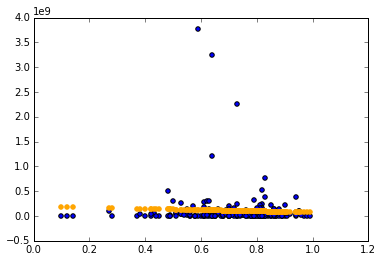

In [106]:
plt.scatter(metarating, y)
plt.scatter(metarating, results.predict(X), color='orange')

Our training set indicates that there's not a very good link between `MetaCritic` Ratings and `Box Office Gross` income. If anything, the correlation is flat, and with relatively high p-values, we can't even be too certain about that. Lets see how a model like this would do on a test set.

In [108]:
test_y = []
test_x = []
for i in range(int(len(df)*.75), len(df)):
    test_y.append(df['BoxOfficeGross'][i])
    test_x.append(df['MetaRating'][i])
y = test_y
metarating = test_x
x2 = [1 for i in range(len(metarating))]
X = pd.DataFrame(data={'Meta': metarating, 'Intercept': x2})
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     4.962
Date:                Mon, 13 Jul 2015   Prob (F-statistic):             0.0291
Time:                        12:16:20   Log-Likelihood:                -1508.7
No. Observations:                  72   AIC:                             3021.
Df Residuals:                      70   BIC:                             3026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.08e+08    1.8e+08      2.826      0.006      1.49e+08  8.67e+08
Meta       -5.516e+08   2.48e+08     -2.227      0.029     -1.05e+09 -5.77e+07
==============================================================================
Omnibus:                      103.760   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2050.964
Skew:                           4.536   Prob(JB):                         0.00
Kurtosis:                      27.522   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

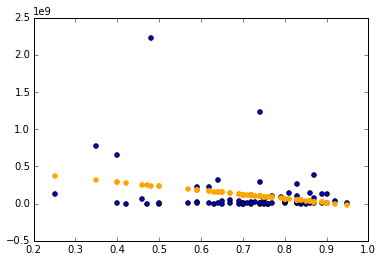

In [112]:
plt.scatter(metarating, y)
plt.scatter(metarating, results.predict(X), color='orange')

Interestingly, we see that the model actually predicts better for the test set than the training set! This is kind of cool. However, despite better p-values, we still see that the effect size is low - indicating that `MetaCritic` rating alone does little to explain how financially successful a movie is. 

(array([ 69.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.15949402e+12,   4.70299825e+17,   9.40596490e+17,
          1.41089316e+18,   1.88118982e+18,   2.35148649e+18,
          2.82178315e+18,   3.29207982e+18,   3.76237648e+18,
          4.23267315e+18,   4.70296981e+18]),
 <a list of 10 Patch objects>)

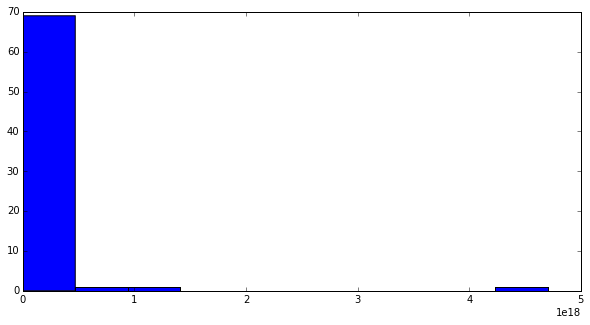

In [113]:
resid = [(ypred[i] - y[i])**2 for i in range(len(y))]
plt.figure(figsize=(10,5))
plt.hist(resid)

###Ratings

In [120]:
df = df[df.BoxOfficeGross != 0]
y = df['MetaRating'].as_matrix().tolist()
x1 = [1 for _ in y] # constant
metarating = df['UserRating'].as_matrix().tolist()
X = pd.DataFrame(data={'Meta': metarating, 'Intercept': x1})
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     96.73
Date:                Mon, 13 Jul 2015   Prob (F-statistic):           7.50e-20
Time:                        14:16:18   Log-Likelihood:                 174.28
No. Observations:                 288   AIC:                            -344.6
Df Residuals:                     286   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1027      0.084     -1.230      0.220        -0.267     0.062
Meta           1.0980      0.112      9.835      0.000         0.878     1.318
==============================================================================
Omnibus:                       97.544   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.522
Skew:                          -1.407   Prob(JB):                     3.48e-81
Kurtosis:                       7.791   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

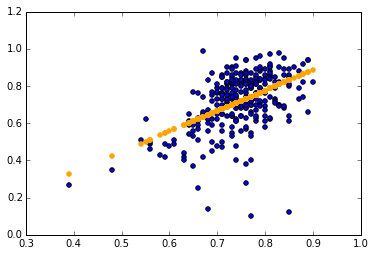

In [121]:
plt.scatter(metarating, y)
plt.scatter(metarating, results.predict(X), color='orange')

Well that's good.